# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_results_df = pd.merge( study_results, mouse_metadata, how= 'left')

# Display the data table for preview
merged_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
merged_results_df['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_results_df.loc[merged_results_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_m_ID = merged_results_df.loc[merged_results_df["Mouse ID"] == "g989", :]
duplicated_m_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
New_Mouse_df = merged_results_df.drop(merged_results_df[merged_results_df['Mouse ID'] == 'g989'].index)
New_Mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
New_Mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen =New_Mouse_df.groupby(["Drug Regimen"])
drug_regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen['Tumor Volume (mm3)'].mean()
med = drug_regimen['Tumor Volume (mm3)'].median()
var = drug_regimen['Tumor Volume (mm3)'].var()
std= drug_regimen['Tumor Volume (mm3)'].std()
stderr= drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
Output =pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": med,
   "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std,
     "Tumor Volume Std. Err.": stderr})
Output

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_statistics = New_Mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean= 'mean', 
    Median='median',
    Variance = 'var',
    Std = 'std',
    stderr='sem'
)

Summary_statistics

,Mean,Median,Variance,Std,stderr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

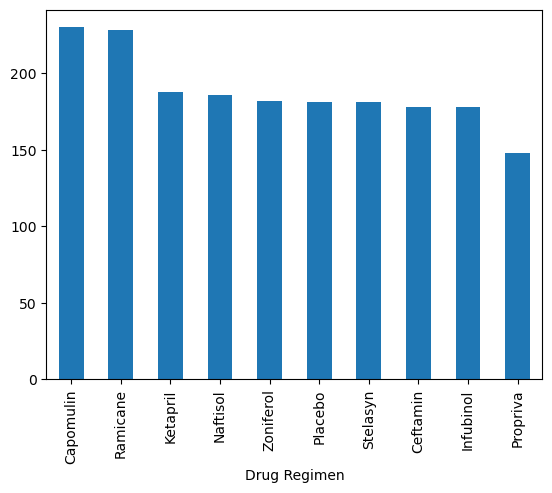

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

df = pd.DataFrame(New_Mouse_df)

regimen_counts = df.groupby('Drug Regimen').size().sort_values(ascending=False)

regimen_counts.plot(kind='bar')

plt.show()

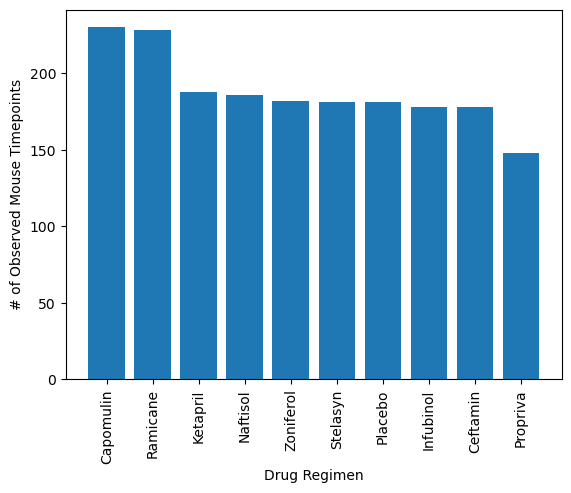

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#count rows for every instance of drug regimen
count = New_Mouse_df['Drug Regimen'].value_counts()
#create bar chart
plt.bar(count.index ,count, align = "center")

#create the ticks 
plt.xticks(rotation= 90)

# Define x and y labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Display bar chart
plt.show()

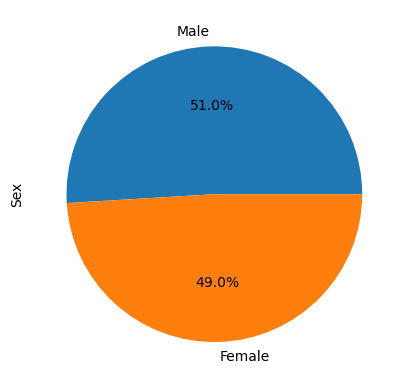

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = New_Mouse_df["Sex"].value_counts()
# Pie Plot using Pandas
gender_distribution.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

([<matplotlib.patches.Wedge at 0x227e4390af0>,
 [Text(-0.03308201408261547, 1.0995024239828841, ''),
  Text(0.033082014082615095, -1.0995024239828841, '')])

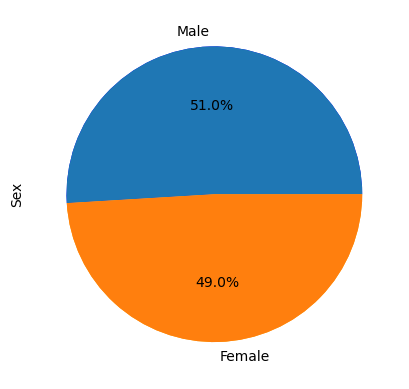

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ['Male', 'Female']
sizes = New_Mouse_df["Sex"].value_counts()


fig, ax = plt.subplots()

ax.pie(sizes, labels= labels, autopct='%1.1f%%',colors = ["blue", "orange"])
plt.ylabel("Sex")
plt.pie(sizes)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df = pd.DataFrame(New_Mouse_df)

select_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = df[df['Drug Regimen'].isin(select_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

print(final_tumor_volume)

   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0      a203         45           67.973419    Infubinol
1      a251         45           65.525743    Infubinol
2      a275         45           62.999356     Ceftamin
3      a411         45           38.407618     Ramicane
4      a444         45           43.047543     Ramicane
..      ...        ...                 ...          ...
95     y769         45           68.594745     Ceftamin
96     y793         45           31.896238    Capomulin
97     y865         45           64.729837     Ceftamin
98     z578         45           30.638696     Ramicane
99     z581         45           62.754451    Infubinol

[100 rows x 4 columns]


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
df = pd.DataFrame(final_tumor_volume)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

#Loop through treatment 
for treatment in treatments_list:
    tumor_volume_subset = df.loc[df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume_subset)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume_subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume_subset.loc[(tumor_volume_subset < lower_bound) | (tumor_volume_subset > upper_bound)]

    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

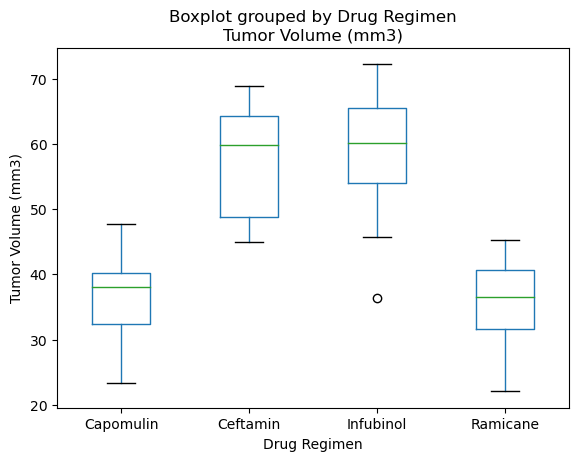

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df = pd.DataFrame(final_tumor_volume)

# Generate a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', showfliers=True, grid=False)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')


# Show the plot
plt.show()

## Line and Scatter Plots

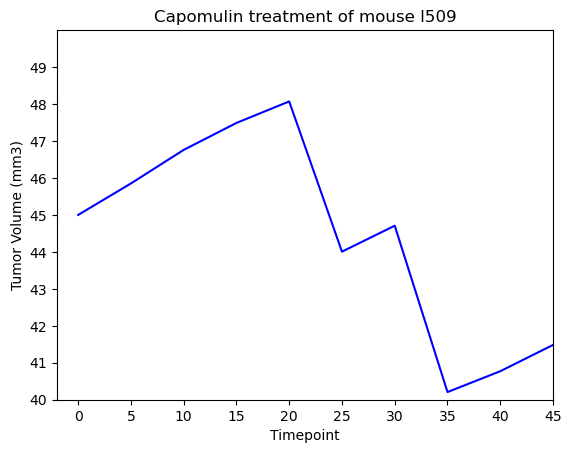

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df = pd.DataFrame(New_Mouse_df)

# Choose a single mouse ID
select_mouse = 'l509'

# Filter DataFrame for the selected mouse and Capomulin regimen
selected_mouse = df[(df['Mouse ID'] == select_mouse) & (df['Drug Regimen'] == 'Capomulin')]

# Generate a line plot
plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], color='b', label=f'Mouse {select_mouse}')

plt.xlim(-2, 45)
plt.xticks(range(0, 46,5))
plt.ylim(40, 50)
plt.yticks(range(40, 50,1))

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {select_mouse}')

# Show the plot
plt.show()

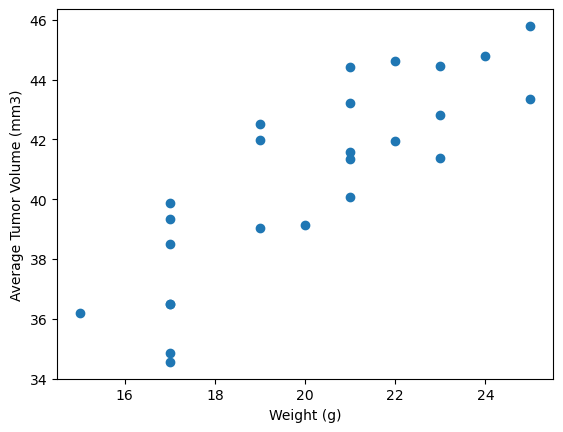

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df = pd.DataFrame(New_Mouse_df)

#Filter for Capoomulin regimen
capomulin_df = df[df['Drug Regimen']== 'Capomulin']

#calculate aerage observed tumor volume 
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Merge with original DataFrame with mouse weights
merged_df = pd.merge(capomulin_df[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID').drop_duplicates()

# Create a scatter plot
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


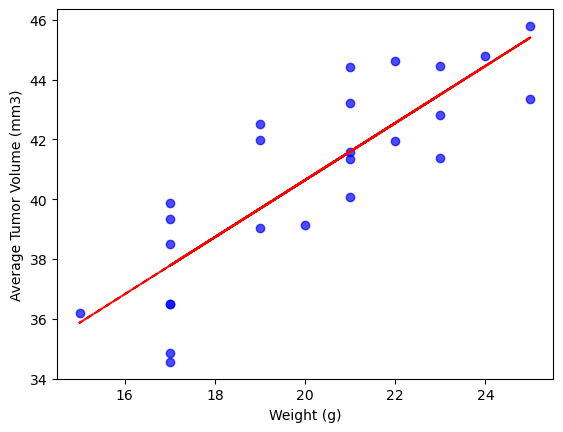

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter DataFrame for Capomulin regimen
df = pd.DataFrame(New_Mouse_df)
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with the original DataFrame to include mouse weights
merged_df = pd.merge(capomulin_df[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID').drop_duplicates()

# Calculate the correlation coefficient
correlation_coefficient = merged_df['Weight (g)'].corr(merged_df['Tumor Volume (mm3)'])

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Add the linear regression line to the plot
plt.plot(merged_df['Weight (g)'], slope * merged_df['Weight (g)'] + intercept, color='red', linestyle='--', label='Linear Regression')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Add the correlation coefficient to the plot
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Show the plot
plt.show()

